<a href="https://colab.research.google.com/github/AmiBZ/ML/blob/main/Multi_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Regression ( *Phi = R(t,phi0)* )**

## Import Data and libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r /content/drive/MyDrive/Colab_Notebooks/Master_Thesis/Data Input
drive.flush_and_unmount()

Mounted at /content/drive


In [13]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.svm import SVR
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

##Read csv add phi0 and plot data for 1.1, 2.1 , 5.1 and 6.1

In [5]:
# Reference point Aq1: radius and start angles
R = 494.
phi0s = np.array([66.6, 70.8, 75.3, 79.8]) / 180. * np.pi
# run 57.8 degree offset between Aq1 and release angle
phi0s = phi0s - 57.8 / 180 * np.pi

path = '/content/Input/'
data = {}
for i, phi0 in enumerate(phi0s):
  # exclude rep 3 and 4
  if (i==2 or i==3): i=i+2
  e = str(i + 1) + ".1" # let's take only one repitition
  data[e] = pd.read_csv(path + "Cleansed" + e + ".csv", usecols=[0,1])
  data[e].insert(1, "phi0", phi0) #add phi0 value to each experiment


In [10]:
x_data = data['1.1']['time'].to_numpy()
y_data = data['1.1']['phi0'].to_numpy()
z_data = data['1.1']['phi'].to_numpy()

*there is no other library to implement multiple linear regression we do it with linear regression only.*

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


(0.0, 0.1793442952278166)

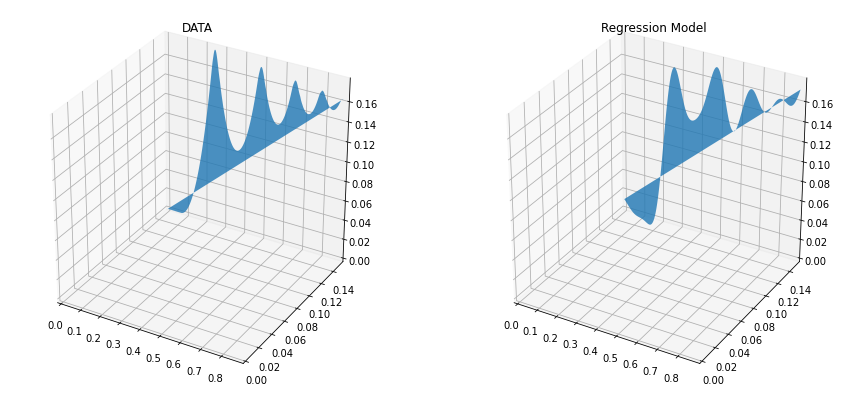

In [16]:
# plot experiments

fig = plt.figure()
fig.set_size_inches(15, 7)
ax = fig.add_subplot(1, 2, 1, projection='3d')
x_data = data['1.1']['time'].to_numpy()
y_data = data['1.1']['phi0'].to_numpy()
z_data = data['1.1']['phi'].to_numpy()

vertices = [list(zip(x_data,y_data,z_data))]

poly = Poly3DCollection(vertices, alpha=0.8)

ax.add_collection3d(poly)
ax.set_title('DATA')
ax.set_xlim(0, x_data.max())
ax.set_ylim(0, y_data.max())
ax.set_zlim(0, z_data.max()) 

# Multiple regression Model
X = data['1.1'][['time', 'phi0']] # independent values
y = data['1.1'][['phi']] # dependent value
svr = SVR(kernel="rbf", C=4627. , gamma=81., epsilon=0.0001 , tol=1.e-4, max_iter=1000)
svr.fit(X, y)
predicted_phi = svr.predict(X)
# Plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
vertices = [list(zip(x_data,y_data,predicted_phi))]
poly = Poly3DCollection(vertices, alpha=0.8)
ax.add_collection3d(poly)
ax.set_title('Regression Model')
ax.set_xlim(0, x_data.max())
ax.set_ylim(0, y_data.max())
ax.set_zlim(0, z_data.max()) 